In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/stroke.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Drop the 'id' column
df = df.drop('id', axis=1)

# Impute missing values in 'bmi' column with median
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)

In [9]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
columns = ['gender','hypertension','heart_disease', 'ever_married', 'work_type','Residence_type','smoking_status','stroke']  # Specify the columns you want to check

for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'gender': [1 0 2]
Unique values in 'hypertension': [0 1]
Unique values in 'heart_disease': [1 0]
Unique values in 'ever_married': [1 0]
Unique values in 'work_type': [2 3 0 4 1]
Unique values in 'Residence_type': [1 0]
Unique values in 'smoking_status': [1 2 3 0]
Unique values in 'stroke': [1 0]


In [11]:
unique_count = df[df['smoking_status'] == 'Unknown'].shape[0]
print("Count of 'Unknown' in 'smoking_status':", unique_count)

Count of 'Unknown' in 'smoking_status': 1544


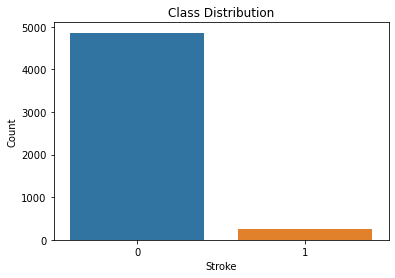

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stroke')
plt.title('Class Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()



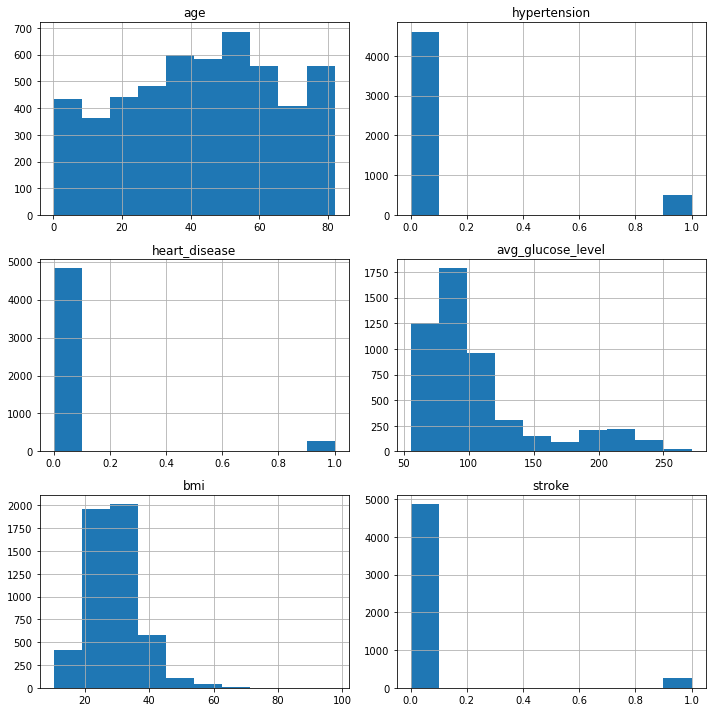

In [13]:
# Feature distributions
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()


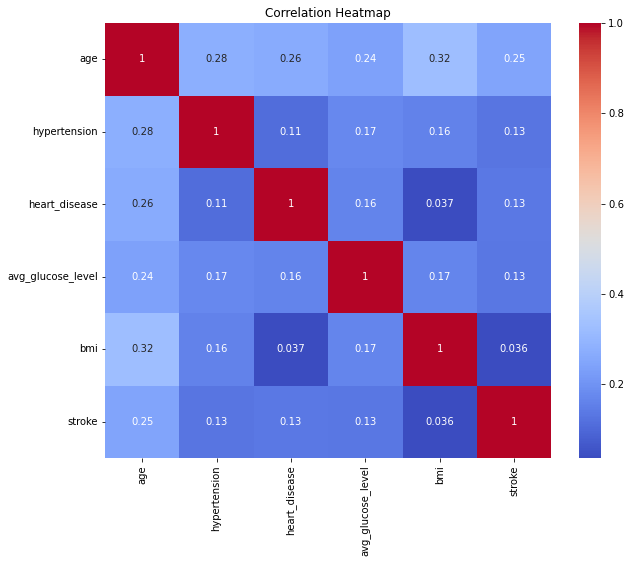

In [14]:

# Feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Label encode the 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

# Label encode the 'ever_married' column
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])

# Label encode the 'work_type' column
df['work_type'] = label_encoder.fit_transform(df['work_type'])

# Label encode the 'Residence_type' column
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

# Label encode the 'smoking_status' column
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])


In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [17]:
X = df.drop(columns=['stroke'],axis=1)

In [18]:
y = df['stroke']

In [19]:
X.shape

(5110, 10)

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4088, 10), (1022, 10))

In [21]:
from lazypredict.Supervised import LazyClassifier

In [22]:
clf = LazyClassifier (verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test) 
print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:11<00:00,  2.69it/s]

[LightGBM] [Info] Number of positive: 187, number of negative: 3901
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045744 -> initscore=-3.037880
[LightGBM] [Info] Start training from score -3.037880


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.40it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.75               0.70     0.70      0.81   
GaussianNB                         0.87               0.68     0.68      0.89   
QuadraticDiscriminantAnalysis      0.88               0.68     0.68      0.90   
PassiveAggressiveClassifier        0.85               0.63     0.63      0.87   
DecisionTreeClassifier             0.91               0.55     0.55      0.90   
XGBClassifier                      0.94               0.54     0.54      0.92   
LGBMClassifier                     0.93               0.54     0.54      0.92   
LabelSpreading                     0.92               0.53     0.53      0.91   
LabelPropagation                   0.92               0.53     0.53      0.91   
Perceptron                         0.94               0.53     0.53      0.91   
BaggingClassifier           

In [29]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Create and train the XGBClassifier model
st_model = XGBClassifier()
st_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = st_model.predict(X_test)

# Print the predicted values
print(y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[0 0 0 ... 0 0 0]
Accuracy: 0.9373776908023483


In [24]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[953   7]
 [ 57   5]]


In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4688,0,0,0
4478,0,0,0
3849,0,0,0
4355,0,1,-1
3826,0,0,0
...,...,...,...
3605,0,0,0
4934,0,0,0
4835,0,0,0
4105,0,0,0


# Predict Stroke 

In [26]:


# Create an empty dictionary to store user inputs
user_inputs = {}

# Iterate through each feature and get user inputs
for feature in X_test.columns:
    user_input = input(f"Enter the value for {feature}: ")
    # Convert the user input to the appropriate data type
    user_inputs[feature] = float(user_input)

# Create a DataFrame from the user inputs
user_data = pd.DataFrame([user_inputs])

# Make predictions on the user data using the trained model
prediction = model.predict(user_data)

# Print the predicted value
print("Predicted Outcome:", prediction)



KeyboardInterrupt: Interrupted by user

In [28]:
import gradio as gr
from sklearn.preprocessing import LabelEncoder

# Create a function to make predictions with the model
def predict_kidney_disease(gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status):
    # Create a dictionary of the user inputs
    user_inputs = {
        'gender': gender,
        'age': int(age),
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'ever_married':ever_married,
        'work_type':work_type,
        'Residence_type':Residence_type,
        'avg_glucose_level':float(avg_glucose_level),
        'bmi':float(bmi),
        'smoking_status':smoking_status    
    }

    # Create a DataFrame from the user inputs
    user_data = pd.DataFrame([user_inputs])
    
     # Convert categorical features to numerical using label encoding
    categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        user_data[feature] = label_encoder.fit_transform(user_data[feature])

    # Make predictions on the user data using the trained model
    disease_prediction = model.predict(user_data)

    # Display the predicted outcome
    if disease_prediction[0] == 1:
        return "Yes"
    else:
        return "No"

# Define the inputs for the Gradio interface
# Define the inputs for the Gradio interface
inputs = [
    gr.inputs.Dropdown(["Male", "Female", "Other"], label="Gender"),
    gr.inputs.Number(label="Age"),
    gr.inputs.Dropdown(['No','Yes'], label="Hypertension"),
    gr.inputs.Dropdown(['No','Yes'], label="Heart Disease"),
    gr.inputs.Dropdown(["Yes", "No"], label="Ever Married"),
    gr.inputs.Dropdown(["Private", "Self-employed", "Govt_job","Never_worked"], label="Work Type"),
    gr.inputs.Dropdown(["Urban", "Rural"], label="Residence Type"),
    gr.inputs.Number(label="Average Glucose Level"),
    gr.inputs.Number(label="BMI"),
    gr.inputs.Dropdown(["formerly smoked", "never smoked", "smokes", "Unknown"], label="Smoking Status"),
]

# Define the output for the Gradio interface
output = gr.outputs.Textbox(label="Prediction")

# Create the Gradio interface
iface = gr.Interface(fn=predict_kidney_disease, inputs=inputs, outputs=output, title="stroke Disease Prediction")

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [30]:
import pickle

# Save the model as a pickle file
with open("st_model.pkl", "wb") as f:
    pickle.dump(st_model, f)